In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# %matplotlib notebook
# %matplotlib inline
# %matplotlib ipympl
%matplotlib widget


In [2]:
class BboxSelect:

    def __init__(self, image):
        self.image = image
        self.selected_points = []
        self.fig, self.ax = plt.subplots()
        self.img = self.ax.imshow(self.image.copy())
        self.click_event = self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)

    def draw_polygon(self, img, pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(img, [pts], True, (0, 255, 0), 4)
        return img

    def on_click(self, event):
        # display(str(event))
        self.selected_points.append([event.xdata, event.ydata])
        if len(self.selected_points) > 1:
            self.img.set_data(self.draw_polygon(self.image.copy(), self.selected_points))
            self.fig.canvas.draw()

    def disconnect_mpl(self, _):
        self.fig.canvas.mpl_disconnect(self.click_event)

Button(description='Disconnect mpl', style=ButtonStyle())

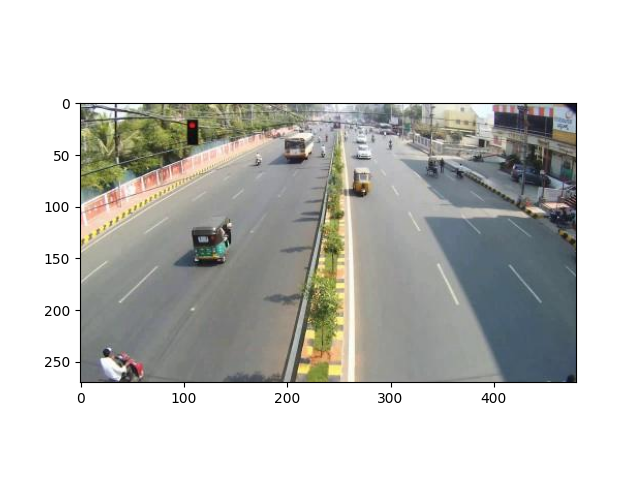

In [3]:
image = cv2.imread('0.jpg')
bs = BboxSelect(cv2.cvtColor(image[:, :, :], cv2.COLOR_BGR2RGB))

In [5]:
print(bs.selected_points)

[[68.39868951612904, 121.75151209677418], [154.52772177419354, 50.138608870967744], [310.33417338709677, 51.10635080645159], [376.140625, 154.6547379032258]]
